# 21M.387 Fundamentals of Music Processing
## Lab 6

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact
import sys
sys.path.append("..")
import fmplib as fmp
from fmplib.pyqueue import connect_to_queue

plt.rcParams['figure.figsize'] = (12, 4)
fmp.documentation_button()

## Exercise 1

There are two normalizations we often use: 
- $L^2$ or Euclidean norm
- $L^1$ or Manhattan norm 

Applying a Euclidean norm produces a vector of length 1.  
Applying a Manhattan norm produces a vector whose components sum to 1. This can be useful for vectors acting as a probability distribution where we want:
$$\sum_{n=1}^{N}{p_n} = 1$$

Write the function `L1_normalize_rows` that applies the Manhattan norm to all rows of a matrix and returns the normalized matrix. 

- Load the test data below.
- Test your function by plotting the un-normalized and normalized matrix with `plt.colorbar()` so you can see the results.
- Print the values to check your function as well

matrix:
[[4. 8. 1. 7. 3. 8.]
 [1. 4. 1. 2. 7. 6.]
 [8. 1. 6. 9. 9. 9.]
 [5. 5. 5. 3. 1. 3.]]


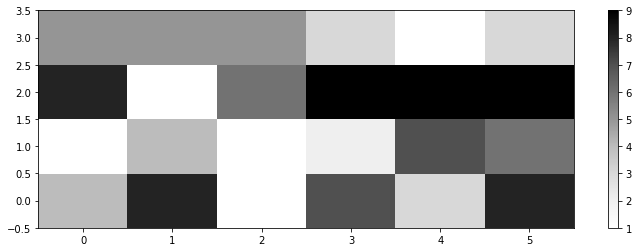


normalized matrix:
[[0.12903226 0.25806452 0.03225806 0.22580645 0.09677419 0.25806452]
 [0.04761905 0.19047619 0.04761905 0.0952381  0.33333333 0.28571429]
 [0.19047619 0.02380952 0.14285714 0.21428571 0.21428571 0.21428571]
 [0.22727273 0.22727273 0.22727273 0.13636364 0.04545455 0.13636364]]

row-wise sum:
[1. 1. 1. 1.]


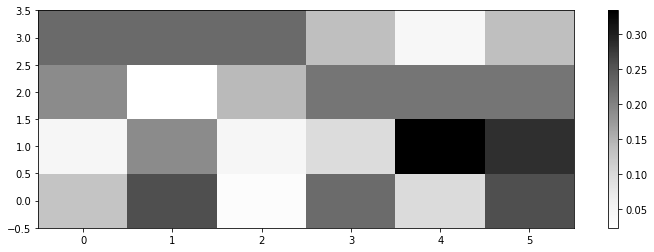

In [30]:
m = np.load('data/lab_ex1.npy')

def L1_normalize_rows(mtx):
    norm = np.linalg.norm(mtx, ord=1, axis=1).reshape((mtx.shape[0], 1))

    return mtx / norm

print('matrix:')
print(m)
plt.imshow(m, origin='lower', aspect='auto', cmap='Greys')
plt.colorbar()
plt.show()

norm_m = L1_normalize_rows(m)
print('\nnormalized matrix:')
print(norm_m)
print('\nrow-wise sum:')
print(np.sum(norm_m, axis=1))
plt.imshow(norm_m, origin='lower', aspect='auto', cmap='Greys')
plt.colorbar()
plt.show()

In [ ]:
connect_to_queue()

## Exercise 2

Write the function `binary_chord_template()` to create a normalized binary chord template. It takes as input a list of pitches and returns a chroma template. By normalized here, we mean using the $L^2$ norm - the length of the chroma template vector should be 1.

Inputs: 
- pitches: a list of pitches to be included in the chord template

Output:
- a length 12 chroma template vector


[0.57735027 0.         0.         0.         0.57735027 0.
 0.         0.57735027 0.         0.         0.         0.        ]


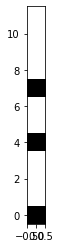

In [43]:
def binary_chord_template(pitches):
    t = np.zeros(12)
    t[pitches] = 1
    return t / np.linalg.norm(t, ord=2)


t = binary_chord_template([0, 4, 7])
print(t)
plt.imshow(np.atleast_2d(t).T, origin='lower', cmap='Greys');
plt.show()

# # fmplib version:
# t2 = fmp.harmonics_chord_template([0,4,7])
# print(t2)
# plt.imshow(np.atleast_2d(t2).T, origin='lower', cmap='Greys');
# plt.show()

Use your function to create the following chord templates:
- A minor
- F major
- E power chord (this is a chord of only two notes: the root and the fifth)

For each one, print and plot the result using `plt.imshow()`. You will need to reshape the vector into a 2-dimensional matrix for `plt.imshow()` to work

[0.57735027 0.         0.         0.         0.57735027 0.
 0.         0.         0.         0.57735027 0.         0.        ]


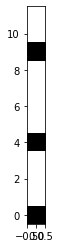

[0.57735027 0.         0.         0.         0.         0.57735027
 0.         0.         0.         0.57735027 0.         0.        ]


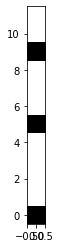

[0.         0.         0.         0.         0.70710678 0.
 0.         0.         0.         0.         0.         0.70710678]


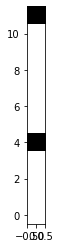

In [45]:
# A minor
A_minor_bt = binary_chord_template([9, 0, 4]) 

# F major
F_major_bt = binary_chord_template([5, 9, 0])

# E power
E_power_bt = binary_chord_template([4, 11])

for t in [A_minor_bt, F_major_bt, E_power_bt]:
    print(t)
    plt.imshow(np.atleast_2d(t).T, origin='lower', cmap='Greys');
    plt.show()

In [ ]:
connect_to_queue()

## Exercise 3

What are the 10 MIDI pitches (approximately) that correspond to the first 10 harmonics of the note C4? Round to the nearest integer. Feel free to use the functions `fmp.pitch_to_freq` and `fmp.freq_to_pitch` if needed.

Now convert the array of pitches to an array of pitch classes.

In [167]:
def pitch_harmonics(pitch, n):
    f = fmp.pitch_to_freq(pitch)
    fs = [h * f for h in range(1, n + 1)]
    ps = [int(np.round(fmp.freq_to_pitch(f))) for f in fs]
    return ps


def pitch_classes(pitches):
    c = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    p_cs = [(p % len(c)) for p in pitches]
    return p_cs, [c[i] for i in p_cs]


def pitch_classes_no_dupes(pitches):
    c = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    p_cs = list(set([(p % len(c)) for p in pitches]))
    p_cs.sort()
    return p_cs, [c[i] for i in p_cs]


ps = pitch_harmonics(60, 10)  # C4's first 10 harmonics
print(f'pitches:\n{ps}')

cs = pitch_classes(ps)
print(f'\npitch classes:\n{cs[0]} => {cs[1]}')

cs = pitch_classes_no_dupes(ps)
print(f'\npitch classes (no dupes):\n{cs[0]} => {cs[1]}')

pitches:
[60, 72, 79, 84, 88, 91, 94, 96, 98, 100]

pitch classes:
[0, 0, 7, 0, 4, 7, 10, 0, 2, 4] => ['C', 'C', 'G', 'C', 'E', 'G', 'A#', 'C', 'D', 'E']

pitch classes (no dupes):
[0, 2, 4, 7, 10] => ['C', 'D', 'E', 'G', 'A#']


## Exercise 4

Write the function `harmonics_chord_template()` to create a normalized chord template that contains energies of the first 8 harmonics for __each note__ in the chord.

The harmonic energies of a given note should be proportional to $\alpha^n$ where $n$ is the harmonic number ($n=0$ is the fundamental, $n=1$ is the 2nd harmonic, etc...).

Inputs:

- pitches: a list of pitches to be included in the chord template
- alpha:  $\alpha$, the harmonic decay value

Outputs:
- a length 12 chroma template vector


In [171]:
def harmonics_chord_template(pitches, alpha):
    t = np.zeros(12)
    n = 8
    es = [alpha ** i for i in range(n)]
    for p in pitches:
        hs = pitch_classes(pitch_harmonics(p, n))[0]
        for i, h in enumerate(hs):
            t[h] += es[i]
    
    return t / np.linalg.norm(t)

As above, use your function to create the following chord templates, using a harmonic decay value of $\alpha = 0.7$. 
- A minor
- F major
- E power chord (this is a chord of only two notes: the root and the fifth)

For each one, print and plot the result using `plt.imshow()`. You will need to reshape the vector into a 2-dimensional matrix for `plt.imshow()` to work.

You can check your answers against `fmp.harmonics_chord_template()`

[0.48311324 0.05457701 0.02674274 0.         0.68727581 0.
 0.         0.1763283  0.05457701 0.48311324 0.02674274 0.14958557]


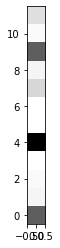

[0.6326988  0.05457701 0.         0.02674274 0.20416258 0.48311324
 0.         0.1763283  0.         0.53769025 0.02674274 0.        ]


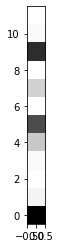

[0.         0.         0.03283185 0.06700377 0.59311431 0.
 0.18364502 0.         0.06700377 0.03283185 0.         0.77675933]


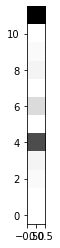

In [176]:
alpha = 0.7

# A minor
A_minor_ht = harmonics_chord_template([9, 0, 4], alpha)
#A_minor_ht2 = fmp.harmonics_chord_template([9, 0, 4], alpha)

# F major
F_major_ht = harmonics_chord_template([5, 9, 0], alpha)
#F_major_ht2 = fmp.harmonics_chord_template([5, 9, 0], alpha)

# E power
E_power_ht = harmonics_chord_template([4, 11], alpha)
#E_power_ht2 = fmp.harmonics_chord_template([4, 11], alpha)

for t in [A_minor_ht, F_major_ht, E_power_ht]:
    print(t)
    plt.imshow(np.atleast_2d(t).T, origin='lower', cmap='Greys');
    plt.show()

# # # fmplib:
# for t in [A_minor_ht2, F_major_ht2, E_power_ht2]:
#     print(t)
#     plt.imshow(np.atleast_2d(t).T, origin='lower', cmap='Greys');
#     plt.show()

## Exercise 5

In this exercise, we'll see how the templates you created above score against some piano chords.

- Load the following wave file of a piano playing an F major chord and an A minor chord.
- Listen to it.
- Create a chromagram of this audio using `fmp.make_chromagram()` with $N=4096$, $H=N/2$, $\gamma = 0.5$
- Plot the chromagram


In [ ]:
snd = fmp.load_wav('audio/lab_ex5.wav')
fs = 22050


For each of the six chord templates you created above, see what scores they produce over the length of the chromagram, and how these scores compare to each other by plotting them all on a single figure.

What do you observe? How do the binary and harmonic templates compare?

In [ ]:
connect_to_queue()

## Exercise 6

Say we have a Markov model with these parameters:

- $I = 3$ (number of states)
- $\mathcal{A} = \lbrace \mathbf{C,G,F} \rbrace $ (the states)
- The probability of starting the song on $\mathbf{C}$ is 3 times more likley than starting on $\mathbf{F}$ or $\mathbf{G}$.
- The probability of staying on the same chord is 8 times more likely than moving to a different chord, but there is no difference in probability as to which chord is moved to.

Write the vector $C$ of initial probablilities and matrix $A$ of transition probabilities as `numpy` arrays.

In [ ]:
C = ...
A = ...

In [ ]:
print('C=\n', C)
print('A=\n', A)

In [ ]:
connect_to_queue()

## Exercise 7

Write the function `markov_sequence_prob(seq, init_p, trans_p)` which takes as input:
- a sequence of states
- the initial probability vector
- the transition probability matrix

Given the Markov model of _Exercise 6_, find the probability of these two sequences:

$$S_1 = (\mathbf{C,C,G,F,F,G,C,C})$$
$$S_2 = (\mathbf{F,F,C,C,C,G,G,G})$$

Which is more likely and by how much?

In [ ]:
def markov_sequence_prob(seq, init_p, trans_p):
    pass

In [ ]:
connect_to_queue('checkoff')